In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(10196.7881)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 8127.43986  validloss 331300.10906±0.00000  bestvalidloss 331300.10906  last_update 0
train: iter 1  trainloss 1370.05141  validloss 10560.84131±0.00000  bestvalidloss 10560.84131  last_update 0
train: iter 2  trainloss 1145.95099  validloss 2226.67050±0.00000  bestvalidloss 2226.67050  last_update 0
train: iter 3  trainloss 1045.69858  validloss 2376.21435±0.00000  bestvalidloss 2226.67050  last_update 1
train: iter 4  trainloss 959.77880  validloss 1596.00425±0.00000  bestvalidloss 1596.00425  last_update 0
train: iter 5  trainloss 892.82001  validloss 1557.11229±0.00000  bestvalidloss 1557.11229  last_update 0
train: iter 6  trainloss 845.74345  validloss 1508.53335±0.00000  bestvalidloss 1508.53335  last_update 0
train: iter 7  trainloss 824.79009  validloss 1969.60122±0.00000  bestvalidloss 1508.53335  last_update 1
train: iter 8  trainloss 833.67252  validloss 2288.69890±0.00000  bestvalidloss 1508.53335  last_update 2
train: iter 9  tr

train: iter 77  trainloss -736.88609  validloss -529.63827±0.00000  bestvalidloss -639.51442  last_update 5
train: iter 78  trainloss -763.55423  validloss -722.09453±0.00000  bestvalidloss -722.09453  last_update 0
train: iter 79  trainloss -661.09254  validloss -656.01348±0.00000  bestvalidloss -722.09453  last_update 1
train: iter 80  trainloss -761.71185  validloss -447.59387±0.00000  bestvalidloss -722.09453  last_update 2
train: iter 81  trainloss -686.71525  validloss -745.57929±0.00000  bestvalidloss -745.57929  last_update 0
train: iter 82  trainloss -538.77528  validloss -480.89989±0.00000  bestvalidloss -745.57929  last_update 1
train: iter 83  trainloss -446.41278  validloss -571.46364±0.00000  bestvalidloss -745.57929  last_update 2
train: iter 84  trainloss -501.38770  validloss 37.91164±0.00000  bestvalidloss -745.57929  last_update 3
train: iter 85  trainloss -789.64118  validloss -589.99635±0.00000  bestvalidloss -745.57929  last_update 4
train: iter 86  trainloss -718

train: iter 153  trainloss -922.12612  validloss -371.59996±0.00000  bestvalidloss -948.49175  last_update 15
train: iter 154  trainloss -936.24886  validloss -862.19925±0.00000  bestvalidloss -948.49175  last_update 16
train: iter 155  trainloss -796.14108  validloss -820.04410±0.00000  bestvalidloss -948.49175  last_update 17
train: iter 156  trainloss -789.50362  validloss -290.43966±0.00000  bestvalidloss -948.49175  last_update 18
train: iter 157  trainloss -1019.86686  validloss -870.45268±0.00000  bestvalidloss -948.49175  last_update 19
train: iter 158  trainloss -983.07868  validloss -943.36139±0.00000  bestvalidloss -948.49175  last_update 20
train: iter 159  trainloss -1033.81366  validloss -848.90444±0.00000  bestvalidloss -948.49175  last_update 21
train: iter 160  trainloss -1035.33221  validloss -972.43788±0.00000  bestvalidloss -972.43788  last_update 0
train: iter 161  trainloss -1035.15799  validloss -921.62621±0.00000  bestvalidloss -972.43788  last_update 1
train: i

train: iter 227  trainloss -1168.05748  validloss -1012.56834±0.00000  bestvalidloss -1086.93474  last_update 21
train: iter 228  trainloss -1170.10890  validloss -1112.67066±0.00000  bestvalidloss -1112.67066  last_update 0
train: iter 229  trainloss -1196.48105  validloss -1048.44716±0.00000  bestvalidloss -1112.67066  last_update 1
train: iter 230  trainloss -1018.27570  validloss -917.90222±0.00000  bestvalidloss -1112.67066  last_update 2
train: iter 231  trainloss -1062.71869  validloss -947.25729±0.00000  bestvalidloss -1112.67066  last_update 3
train: iter 232  trainloss -1085.75816  validloss -1021.06132±0.00000  bestvalidloss -1112.67066  last_update 4
train: iter 233  trainloss -1121.02056  validloss -1004.36691±0.00000  bestvalidloss -1112.67066  last_update 5
train: iter 234  trainloss -1180.35529  validloss -1099.09804±0.00000  bestvalidloss -1112.67066  last_update 6
train: iter 235  trainloss -916.94897  validloss -1140.82609±0.00000  bestvalidloss -1140.82609  last_upd

train: iter 301  trainloss -1064.10669  validloss -1123.16266±0.00000  bestvalidloss -1231.46243  last_update 20
train: iter 302  trainloss -1256.27587  validloss -1004.52530±0.00000  bestvalidloss -1231.46243  last_update 21
train: iter 303  trainloss -1285.01005  validloss -1027.69158±0.00000  bestvalidloss -1231.46243  last_update 22
train: iter 304  trainloss -1004.19061  validloss -1257.37804±0.00000  bestvalidloss -1257.37804  last_update 0
train: iter 305  trainloss -1206.16439  validloss -959.06793±0.00000  bestvalidloss -1257.37804  last_update 1
train: iter 306  trainloss -1269.02611  validloss -1182.48320±0.00000  bestvalidloss -1257.37804  last_update 2
train: iter 307  trainloss -1238.07916  validloss -1185.48084±0.00000  bestvalidloss -1257.37804  last_update 3
train: iter 308  trainloss -1337.04102  validloss -1198.83258±0.00000  bestvalidloss -1257.37804  last_update 4
train: iter 309  trainloss -1142.46552  validloss -1284.81594±0.00000  bestvalidloss -1284.81594  last

train: iter 374  trainloss -1310.45466  validloss -1168.99796±0.00000  bestvalidloss -1335.15853  last_update 27
train: iter 375  trainloss -1328.18365  validloss -1188.98141±0.00000  bestvalidloss -1335.15853  last_update 28
train: iter 376  trainloss -1242.27824  validloss -838.50778±0.00000  bestvalidloss -1335.15853  last_update 29
train: iter 377  trainloss -1307.41387  validloss -1239.86012±0.00000  bestvalidloss -1335.15853  last_update 30
train: iter 378  trainloss -1334.92233  validloss -1245.22395±0.00000  bestvalidloss -1335.15853  last_update 31
train: iter 379  trainloss -1264.35337  validloss -1279.29815±0.00000  bestvalidloss -1335.15853  last_update 32
train: iter 380  trainloss -1374.68015  validloss -1268.84681±0.00000  bestvalidloss -1335.15853  last_update 33
train: iter 381  trainloss -1383.87511  validloss -1288.81850±0.00000  bestvalidloss -1335.15853  last_update 34
train: iter 382  trainloss -1400.35123  validloss -1284.79749±0.00000  bestvalidloss -1335.15853 

train: iter 447  trainloss -1385.49204  validloss -1274.48588±0.00000  bestvalidloss -1391.64576  last_update 9
train: iter 448  trainloss -1429.36226  validloss -1346.53327±0.00000  bestvalidloss -1391.64576  last_update 10
train: iter 449  trainloss -1314.99870  validloss -1387.80646±0.00000  bestvalidloss -1391.64576  last_update 11
train: iter 450  trainloss -1382.96784  validloss -1276.34202±0.00000  bestvalidloss -1391.64576  last_update 12
train: iter 451  trainloss -1479.71202  validloss -1320.70258±0.00000  bestvalidloss -1391.64576  last_update 13
train: iter 452  trainloss -1416.19918  validloss -1420.85123±0.00000  bestvalidloss -1420.85123  last_update 0
train: iter 453  trainloss -1015.63801  validloss -1273.40971±0.00000  bestvalidloss -1420.85123  last_update 1
train: iter 454  trainloss -1223.73624  validloss -681.99562±0.00000  bestvalidloss -1420.85123  last_update 2
train: iter 455  trainloss -1296.02162  validloss -658.23105±0.00000  bestvalidloss -1420.85123  last

train: iter 521  trainloss -1477.00417  validloss -1371.34752±0.00000  bestvalidloss -1420.85123  last_update 69
train: iter 522  trainloss -1463.12017  validloss -1402.07131±0.00000  bestvalidloss -1420.85123  last_update 70
train: iter 523  trainloss -1430.94597  validloss -1246.20914±0.00000  bestvalidloss -1420.85123  last_update 71
train: iter 524  trainloss -1480.83287  validloss -1426.20462±0.00000  bestvalidloss -1426.20462  last_update 0
train: iter 525  trainloss -1406.96016  validloss -1169.66577±0.00000  bestvalidloss -1426.20462  last_update 1
train: iter 526  trainloss -1442.05254  validloss -1380.69867±0.00000  bestvalidloss -1426.20462  last_update 2
train: iter 527  trainloss -1376.65991  validloss -1072.64895±0.00000  bestvalidloss -1426.20462  last_update 3
train: iter 528  trainloss -1401.10120  validloss -652.52409±0.00000  bestvalidloss -1426.20462  last_update 4
train: iter 529  trainloss -1464.92362  validloss -1365.14262±0.00000  bestvalidloss -1426.20462  last

train: iter 594  trainloss -1435.05202  validloss -1248.09251±0.00000  bestvalidloss -1445.12581  last_update 33
train: iter 595  trainloss -1494.78811  validloss -1358.38217±0.00000  bestvalidloss -1445.12581  last_update 34
train: iter 596  trainloss -1453.70286  validloss -1279.48940±0.00000  bestvalidloss -1445.12581  last_update 35
train: iter 597  trainloss -1489.30225  validloss -1236.78884±0.00000  bestvalidloss -1445.12581  last_update 36
train: iter 598  trainloss -1391.43199  validloss -1452.86035±0.00000  bestvalidloss -1452.86035  last_update 0
train: iter 599  trainloss -1424.64434  validloss -1293.43823±0.00000  bestvalidloss -1452.86035  last_update 1
train: iter 600  trainloss -1532.20699  validloss -1417.23624±0.00000  bestvalidloss -1452.86035  last_update 2
train: iter 601  trainloss -1505.29144  validloss -1460.17431±0.00000  bestvalidloss -1460.17431  last_update 0
train: iter 602  trainloss -1483.57710  validloss -1344.22360±0.00000  bestvalidloss -1460.17431  la

train: iter 667  trainloss -1441.19561  validloss -1265.67201±0.00000  bestvalidloss -1469.15301  last_update 22
train: iter 668  trainloss -1486.59156  validloss -1407.09101±0.00000  bestvalidloss -1469.15301  last_update 23
train: iter 669  trainloss -1535.75773  validloss -1362.62189±0.00000  bestvalidloss -1469.15301  last_update 24
train: iter 670  trainloss -1514.22196  validloss -1475.79296±0.00000  bestvalidloss -1475.79296  last_update 0
train: iter 671  trainloss -1321.19401  validloss -1075.10116±0.00000  bestvalidloss -1475.79296  last_update 1
train: iter 672  trainloss -1473.70589  validloss -1346.00424±0.00000  bestvalidloss -1475.79296  last_update 2
train: iter 673  trainloss -1429.28009  validloss -1344.41488±0.00000  bestvalidloss -1475.79296  last_update 3
train: iter 674  trainloss -1514.36024  validloss -1324.30040±0.00000  bestvalidloss -1475.79296  last_update 4
train: iter 675  trainloss -1487.37311  validloss -1413.73065±0.00000  bestvalidloss -1475.79296  las

train: iter 740  trainloss -1488.16393  validloss -1304.93577±0.00000  bestvalidloss -1477.44295  last_update 29
train: iter 741  trainloss -1547.62611  validloss -1412.24011±0.00000  bestvalidloss -1477.44295  last_update 30
train: iter 742  trainloss -1514.87143  validloss -1472.52605±0.00000  bestvalidloss -1477.44295  last_update 31
train: iter 743  trainloss -1437.37364  validloss -1066.84410±0.00000  bestvalidloss -1477.44295  last_update 32
train: iter 744  trainloss -1535.71172  validloss -1404.73266±0.00000  bestvalidloss -1477.44295  last_update 33
train: iter 745  trainloss -1470.22580  validloss -1377.73666±0.00000  bestvalidloss -1477.44295  last_update 34
train: iter 746  trainloss -1529.67126  validloss -1324.41585±0.00000  bestvalidloss -1477.44295  last_update 35
train: iter 747  trainloss -1511.08805  validloss -1447.20122±0.00000  bestvalidloss -1477.44295  last_update 36
train: iter 748  trainloss -1558.92151  validloss -1433.68962±0.00000  bestvalidloss -1477.44295

train: iter 813  trainloss -1533.08285  validloss -1374.54068±0.00000  bestvalidloss -1490.28341  last_update 35
train: iter 814  trainloss -1570.28538  validloss -1434.12164±0.00000  bestvalidloss -1490.28341  last_update 36
train: iter 815  trainloss -1547.69215  validloss -1482.13781±0.00000  bestvalidloss -1490.28341  last_update 37
train: iter 816  trainloss -1313.13602  validloss -1444.84071±0.00000  bestvalidloss -1490.28341  last_update 38
train: iter 817  trainloss -1535.04219  validloss -1374.82112±0.00000  bestvalidloss -1490.28341  last_update 39
train: iter 818  trainloss -1535.18041  validloss -1465.04856±0.00000  bestvalidloss -1490.28341  last_update 40
train: iter 819  trainloss -1526.04203  validloss -1394.84250±0.00000  bestvalidloss -1490.28341  last_update 41
train: iter 820  trainloss -1526.55931  validloss -1511.27047±0.00000  bestvalidloss -1511.27047  last_update 0
train: iter 821  trainloss -1460.06487  validloss -893.56743±0.00000  bestvalidloss -1511.27047  

train: iter 886  trainloss -1512.05130  validloss -1467.48972±0.00000  bestvalidloss -1511.27047  last_update 66
train: iter 887  trainloss -1549.11521  validloss -1366.68558±0.00000  bestvalidloss -1511.27047  last_update 67
train: iter 888  trainloss -1524.60550  validloss -1473.75477±0.00000  bestvalidloss -1511.27047  last_update 68
train: iter 889  trainloss -1495.02516  validloss -1403.46242±0.00000  bestvalidloss -1511.27047  last_update 69
train: iter 890  trainloss -1568.13222  validloss -1424.64607±0.00000  bestvalidloss -1511.27047  last_update 70
train: iter 891  trainloss -1548.84734  validloss -1479.27227±0.00000  bestvalidloss -1511.27047  last_update 71
train: iter 892  trainloss -1525.01956  validloss -1509.04295±0.00000  bestvalidloss -1511.27047  last_update 72
train: iter 893  trainloss -1216.07837  validloss -1421.73908±0.00000  bestvalidloss -1511.27047  last_update 73
train: iter 894  trainloss -1455.52858  validloss -1120.39336±0.00000  bestvalidloss -1511.27047

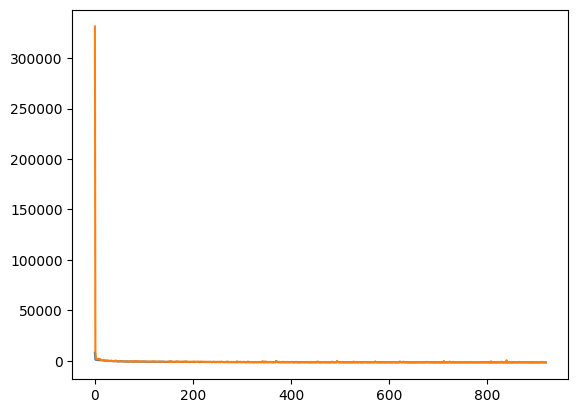

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
# plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 6.28300  validloss 6.60712±0.00000  bestvalidloss 6.60712  last_update 0
train: iter 1  trainloss 5.76794  validloss 6.04515±0.00000  bestvalidloss 6.04515  last_update 0
train: iter 2  trainloss 5.34979  validloss 5.55691±0.00000  bestvalidloss 5.55691  last_update 0
train: iter 3  trainloss 5.00356  validloss 5.19412±0.00000  bestvalidloss 5.19412  last_update 0
train: iter 4  trainloss 4.71537  validloss 4.87512±0.00000  bestvalidloss 4.87512  last_update 0
train: iter 5  trainloss 4.47103  validloss 4.60383±0.00000  bestvalidloss 4.60383  last_update 0
train: iter 6  trainloss 4.26541  validloss 4.38208±0.00000  bestvalidloss 4.38208  last_update 0
train: iter 7  trainloss 4.08082  validloss 4.20052±0.00000  bestvalidloss 4.20052  last_update 0
train: iter 8  trainloss 3.92219  validloss 4.01004±0.00000  bestvalidloss 4.01004  last_update 0
train: iter 9  trainloss 3.77176  validloss 3.85893±0.00000  bestvalidloss 3.85893  last_update 0
train: iter 10  trai

train: iter 82  trainloss -1.79887  validloss -1.89351±0.00000  bestvalidloss -1.89351  last_update 0
train: iter 83  trainloss -1.88108  validloss -1.95154±0.00000  bestvalidloss -1.95154  last_update 0
train: iter 84  trainloss -1.83204  validloss -1.98106±0.00000  bestvalidloss -1.98106  last_update 0
train: iter 85  trainloss -1.89617  validloss -2.00642±0.00000  bestvalidloss -2.00642  last_update 0
train: iter 86  trainloss -1.97386  validloss -1.98540±0.00000  bestvalidloss -2.00642  last_update 1
train: iter 87  trainloss -1.89185  validloss -2.04332±0.00000  bestvalidloss -2.04332  last_update 0
train: iter 88  trainloss -1.89657  validloss -2.07187±0.00000  bestvalidloss -2.07187  last_update 0
train: iter 89  trainloss -1.93047  validloss -2.03696±0.00000  bestvalidloss -2.07187  last_update 1
train: iter 90  trainloss -2.00151  validloss -2.11616±0.00000  bestvalidloss -2.11616  last_update 0
train: iter 91  trainloss -1.94135  validloss -2.05782±0.00000  bestvalidloss -2.1

train: iter 173  trainloss -2.19674  validloss -2.22018±0.00000  bestvalidloss -2.41206  last_update 36
train: iter 174  trainloss -2.17969  validloss -2.35419±0.00000  bestvalidloss -2.41206  last_update 37
train: iter 175  trainloss -2.11638  validloss -2.32466±0.00000  bestvalidloss -2.41206  last_update 38
train: iter 176  trainloss -2.17215  validloss -2.34381±0.00000  bestvalidloss -2.41206  last_update 39
train: iter 177  trainloss -2.16085  validloss -2.33615±0.00000  bestvalidloss -2.41206  last_update 40
train: iter 178  trainloss -2.22936  validloss -2.20957±0.00000  bestvalidloss -2.41206  last_update 41
train: iter 179  trainloss -2.18424  validloss -2.30116±0.00000  bestvalidloss -2.41206  last_update 42
train: iter 180  trainloss -2.21455  validloss -2.25527±0.00000  bestvalidloss -2.41206  last_update 43
train: iter 181  trainloss -2.19687  validloss -2.26270±0.00000  bestvalidloss -2.41206  last_update 44
train: iter 182  trainloss -2.10576  validloss -2.17947±0.00000 

train: iter 262  trainloss -2.09037  validloss -2.33085±0.00000  bestvalidloss -2.45752  last_update 33
train: iter 263  trainloss -2.19641  validloss -2.32416±0.00000  bestvalidloss -2.45752  last_update 34
train: iter 264  trainloss -2.13563  validloss -2.29289±0.00000  bestvalidloss -2.45752  last_update 35
train: iter 265  trainloss -2.18856  validloss -2.33347±0.00000  bestvalidloss -2.45752  last_update 36
train: iter 266  trainloss -2.09278  validloss -2.26372±0.00000  bestvalidloss -2.45752  last_update 37
train: iter 267  trainloss -2.14719  validloss -2.27098±0.00000  bestvalidloss -2.45752  last_update 38
train: iter 268  trainloss -2.11373  validloss -2.24034±0.00000  bestvalidloss -2.45752  last_update 39
train: iter 269  trainloss -2.21322  validloss -2.27767±0.00000  bestvalidloss -2.45752  last_update 40
train: iter 270  trainloss -2.20031  validloss -2.30069±0.00000  bestvalidloss -2.45752  last_update 41
train: iter 271  trainloss -2.08659  validloss -2.43833±0.00000 

train: iter 350  trainloss -2.18165  validloss -2.27112±0.00000  bestvalidloss -2.46597  last_update 53
train: iter 351  trainloss -2.13885  validloss -2.30956±0.00000  bestvalidloss -2.46597  last_update 54
train: iter 352  trainloss -2.10133  validloss -2.25043±0.00000  bestvalidloss -2.46597  last_update 55
train: iter 353  trainloss -2.05935  validloss -2.41434±0.00000  bestvalidloss -2.46597  last_update 56
train: iter 354  trainloss -2.15322  validloss -2.39327±0.00000  bestvalidloss -2.46597  last_update 57
train: iter 355  trainloss -2.19883  validloss -2.25365±0.00000  bestvalidloss -2.46597  last_update 58
train: iter 356  trainloss -2.13110  validloss -2.35685±0.00000  bestvalidloss -2.46597  last_update 59
train: iter 357  trainloss -2.09984  validloss -2.28263±0.00000  bestvalidloss -2.46597  last_update 60
train: iter 358  trainloss -2.12273  validloss -2.25002±0.00000  bestvalidloss -2.46597  last_update 61
train: iter 359  trainloss -2.10267  validloss -2.33343±0.00000 

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([ 1.5908, -2.6323, -5.5467, -4.4183], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 68.84001  validloss 73.12857±0.00000  bestvalidloss 73.12857  last_update 0
train: iter 1  trainloss 48.91132  validloss 58.48966±0.00000  bestvalidloss 58.48966  last_update 0
train: iter 2  trainloss 31.93014  validloss 38.99240±0.00000  bestvalidloss 38.99240  last_update 0
train: iter 3  trainloss 22.84652  validloss 27.09224±0.00000  bestvalidloss 27.09224  last_update 0
train: iter 4  trainloss 17.46308  validloss 20.83030±0.00000  bestvalidloss 20.83030  last_update 0
train: iter 5  trainloss 13.86371  validloss 16.88943±0.00000  bestvalidloss 16.88943  last_update 0
train: iter 6  trainloss 11.42465  validloss 14.29758±0.00000  bestvalidloss 14.29758  last_update 0
train: iter 7  trainloss 9.71676  validloss 12.49165±0.00000  bestvalidloss 12.49165  last_update 0
train: iter 8  trainloss 8.52993  validloss 11.41335±0.00000  bestvalidloss 11.41335  last_update 0
train: iter 9  trainloss 7.67736  validloss 10.65209±0.00000  bestvalidloss 10.65209  last_up

train: iter 85  trainloss 3.40992  validloss 4.76463±0.00000  bestvalidloss 4.71851  last_update 7
train: iter 86  trainloss 3.41981  validloss 4.93738±0.00000  bestvalidloss 4.71851  last_update 8
train: iter 87  trainloss 3.46072  validloss 4.85193±0.00000  bestvalidloss 4.71851  last_update 9
train: iter 88  trainloss 3.44357  validloss 4.79661±0.00000  bestvalidloss 4.71851  last_update 10
train: iter 89  trainloss 3.45620  validloss 4.91514±0.00000  bestvalidloss 4.71851  last_update 11
train: iter 90  trainloss 3.42384  validloss 4.74351±0.00000  bestvalidloss 4.71851  last_update 12
train: iter 91  trainloss 3.42089  validloss 4.71484±0.00000  bestvalidloss 4.71484  last_update 0
train: iter 92  trainloss 3.43941  validloss 4.93919±0.00000  bestvalidloss 4.71484  last_update 1
train: iter 93  trainloss 3.46616  validloss 4.76503±0.00000  bestvalidloss 4.71484  last_update 2
train: iter 94  trainloss 3.43298  validloss 4.75331±0.00000  bestvalidloss 4.71484  last_update 3
train: 

train: iter 168  trainloss 3.36449  validloss 4.67932±0.00000  bestvalidloss 4.59511  last_update 17
train: iter 169  trainloss 3.37121  validloss 4.81728±0.00000  bestvalidloss 4.59511  last_update 18
train: iter 170  trainloss 3.37242  validloss 4.78142±0.00000  bestvalidloss 4.59511  last_update 19
train: iter 171  trainloss 3.35781  validloss 4.73253±0.00000  bestvalidloss 4.59511  last_update 20
train: iter 172  trainloss 3.38288  validloss 4.81599±0.00000  bestvalidloss 4.59511  last_update 21
train: iter 173  trainloss 3.36955  validloss 4.73870±0.00000  bestvalidloss 4.59511  last_update 22
train: iter 174  trainloss 3.35787  validloss 4.69746±0.00000  bestvalidloss 4.59511  last_update 23
train: iter 175  trainloss 3.37480  validloss 4.80436±0.00000  bestvalidloss 4.59511  last_update 24
train: iter 176  trainloss 3.37297  validloss 4.63424±0.00000  bestvalidloss 4.59511  last_update 25
train: iter 177  trainloss 3.37481  validloss 4.77984±0.00000  bestvalidloss 4.59511  last_

train: iter 250  trainloss 3.33019  validloss 4.82243±0.00000  bestvalidloss 4.59511  last_update 99
train: iter 251  trainloss 3.34715  validloss 4.75480±0.00000  bestvalidloss 4.59511  last_update 100
train: fin


In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-11.0065)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-2.3922)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.01371343466575043
tensor([-1.3513])
